In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = 2 * np.random.rand(10000,1)

In [3]:
y = 4 +3 * X+np.random.randn(10000,1)

In [4]:
X_b=np.c_[np.ones(len(X)),X]

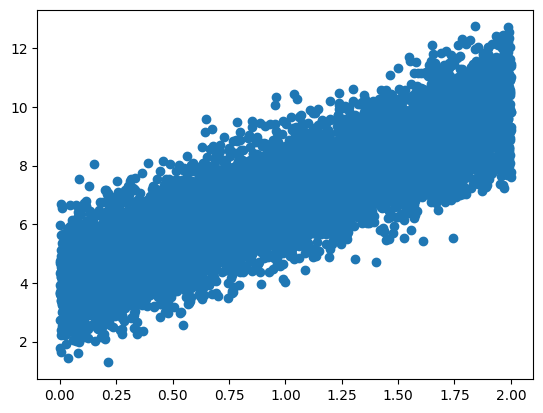

In [5]:
plt.scatter(X,y)

In [11]:
#initializing theta
theta=np.random.randn(2,1)

In [7]:
def cost(theta,feature,y):
    '''
    theta: weights, they are randomly initialized
    X: features
    y: target 
    '''
    m=len(y)
    predictions = feature.dot(theta)
    cost=.5*m*(np.sum(np.square(predictions-y)))
    return cost

In [12]:
lr=.001
n_iter=10

In [13]:
def gradient_descent(X,y,theta,learning_rate,iterations):
    m=y.shape[0]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for epoch in range(iterations):
        y_hat=X.dot(theta)
        theta=theta-(1/m)*learning_rate*(X.T.dot((y_hat-y)))
        theta_history[epoch,:] =theta.T
        cost_history[epoch]  = cost(theta,X,y)
    return theta,cost_history,theta_history

In [14]:
gradient_descent(X_b,y,theta,lr,n_iter)

(array([[1.31326437],
        [0.50005285]]),
 array([1.57075424e+09, 1.56408090e+09, 1.55743685e+09, 1.55082194e+09,
        1.54423605e+09, 1.53767906e+09, 1.53115083e+09, 1.52465124e+09,
        1.51818016e+09, 1.51173748e+09]),
 array([[1.26581368, 0.44468492],
        [1.27113205, 0.4508915 ],
        [1.27643884, 0.45708436],
        [1.28173408, 0.46326354],
        [1.28701779, 0.46942906],
        [1.29229001, 0.47558095],
        [1.29755075, 0.48171925],
        [1.30280004, 0.48784398],
        [1.3080379 , 0.49395517],
        [1.31326437, 0.50005285]]))

In [15]:
X_b[0]

array([1.        , 0.91453278])

In [16]:
%%time
lr =0.01
n_iter = 2000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,.01,n_iter)




CPU times: total: 93.8 ms
Wall time: 137 ms


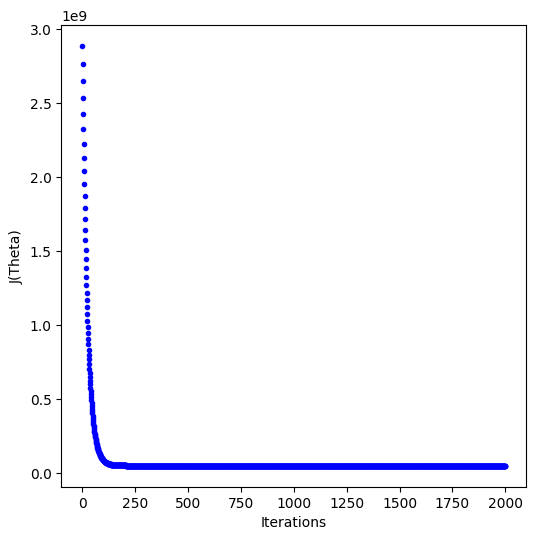

In [21]:
fig,ax = plt.subplots(figsize=(6,6))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [23]:
def plot_GD(n_iter,lr,ax,ax1=None):
    """
    n_iter = no of iterations
    lr = Learning Rate
    ax = Axis to plot the Gradient Descent
    ax1 = Axis to plot cost_history vs Iterations plot

    """
    ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)

    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

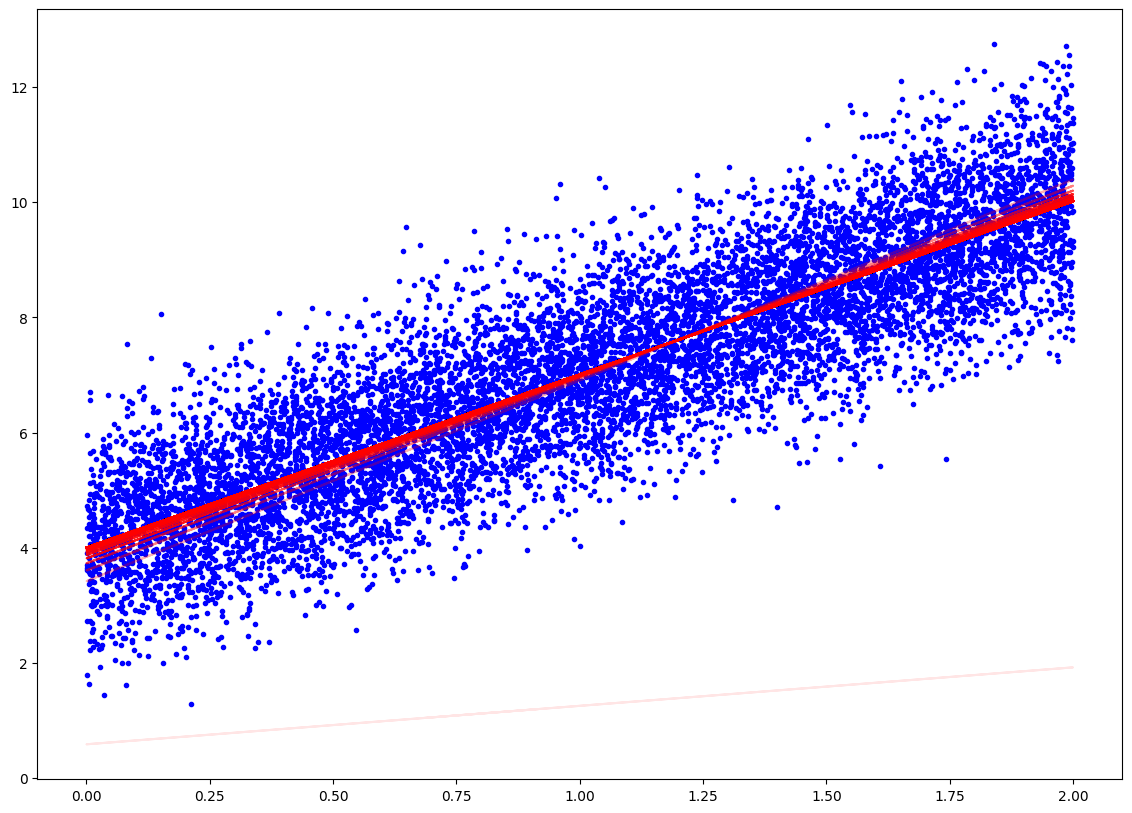

In [24]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(10000,.1,ax)

# Stochastic Gradiend Descent

In [25]:
def stochastic_gradient_descent(theta, X,y,iterations:int, learning_rate:float):
    m=y.shape[0]
    cost_history=np.zeros(iterations)
    for j in range(iterations):
        epoch_cost=0
        for i in range(m):
            rand_index=np.random.randint(0,m)
            X_i=X[rand_index,:].reshape(1,X.shape[1])
            y_i=y[rand_index].reshape(1,1)
            prediction=np.dot(X_i,theta)
            theta=theta-(1/m)*learning_rate*(X_i.T.dot(prediction-y_i))
            epoch_cost+=cost(theta,X_i,y_i)
        cost_history[j]=epoch_cost
    return theta,cost_history

In [26]:
lr =0.01
n_iter = 2000

theta = np.random.randn(2,1)

In [ ]:
%%time
theta, hist=stochastic_gradient_descent(theta, X_b,y,1000, lr)

In [30]:
len(set(np.random.choice(np.arange(0,100),size=50,replace=False)))

50

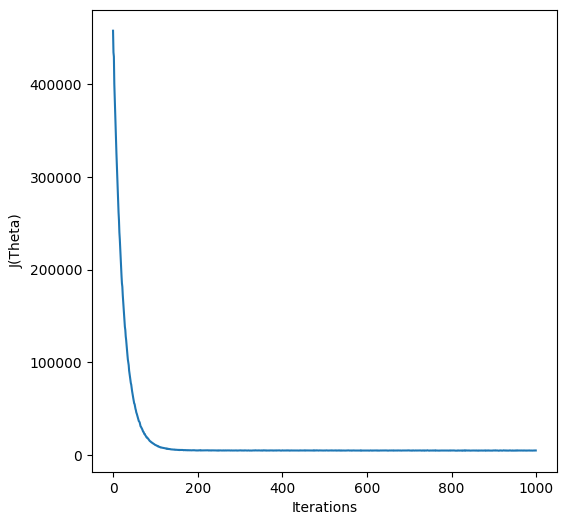

In [31]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),hist)

# Minibatch gradient descent

In [32]:
def mini_batch_gradient_descent(X,y,theta,learning_rate,iterations,batch_size):
    m=y.shape[0]
    cost_history=np.zeros(iterations)
    batches=m/batch_size
    for epoch in range(iterations):
        epoch_cost=0
        indices=np.random.permutation(m)
        X=X[indices]
        y=y[indices]
        for i in range(0,m,batch_size):
            x_i=X[i:i+batch_size]
            y_i=y[i:i+batch_size]
            x_i=np.c_[np.ones(x_i.shape[0]),x_i]
            
            y_i_hat=np.dot(x_i,theta)
            theta=theta-(1/m)*learning_rate*(x_i.T.dot(y_i_hat-y_i))
            
            epoch_cost+=cost(theta,x_i,y_i)
            
        cost_history[epoch]=epoch_cost
    return theta,cost_history

In [33]:
%%time
theta,mini=mini_batch_gradient_descent(X,y,theta,.01,1000,20)

CPU times: total: 16.6 s
Wall time: 21.3 s


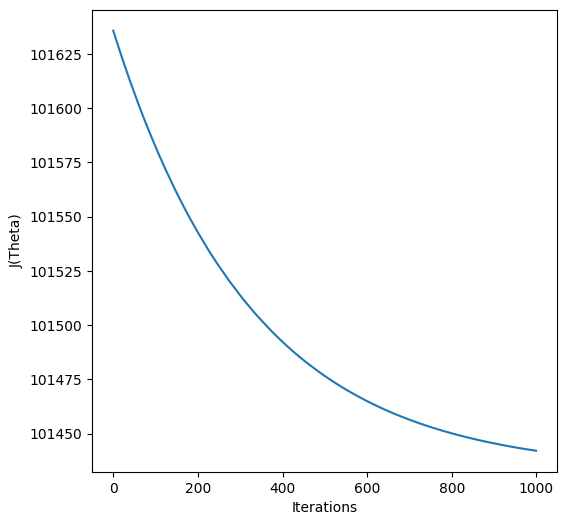

In [34]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(1000),mini)

In [ ]:
mini